# Final Project, Part 4: Technical Notebook

## Build and document a working model.
By now, you're ready to apply your modeling skills to make machine learning predictions. Your goal for this project is to develop a working predictive model or process to resolve your problem statement. You should document your work in a technical notebook that can be shared with your peers.

Build upon your earlier EDA notebook, expanding on your statistical analysis, and include your final model, along with any specific performance metrics and evaluation criteria. Organize your information clearly for an external audience, including a table of contents and clearly demarcated sections, using markdown to create subheaders or descriptions as needed. Finally, include comments on all of your code.

## Requirements

A detailed Jupyter Notebook with a summary of your: statistical analysis, model, and evaluation metrics.
Use markdown to clearly organize all of your notebook's information.
Include comments on all of your code.
Note: Here are some things to consider in your notebook: sample size, correlations, feature importance, unexplained variance or outliers, variable selection, train/test comparison, and any relationships between your target and independent variables.


- Try Linear Regression, Decision Trees/Random Forests
- Do 5 folds Cross Validation, and examine metrics



# Predicting Attractiveness - Models

Can we predict attractiveness based on non-image data?  Does it differ for males vs females?

## Let's try Classifier Decision Trees
This could provide insight into a subconscious decision making process when determining attractiveness


In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
 
%matplotlib inline

## Read in data and Preprocess

In [212]:
# Read data
data = pd.read_csv('Speed Dating Data.csv')
print data.shape

(8378, 195)


In [213]:
# Extract Columns of interest
personal = [u'iid', u'gender', u'age', u'field_cd', u'career_c']
attitude = [u'goal', u'exphappy']
self_perception = [u'attr3_1', u'sinc3_1', u'fun3_1', u'intel3_1', u'amb3_1']
behaviors = [u'date', u'go_out']
interests = [u'sports', u'tvsports', u'exercise', u'dining', u'museums',
       u'art', u'hiking', u'gaming', u'clubbing', u'reading', u'tv',
       u'theater', u'movies', u'concerts', u'music', u'shopping', u'yoga']
pred = ['attr_o']
columns = personal + pred + attitude + self_perception + behaviors
data = data[columns]
data.shape


(8378, 15)

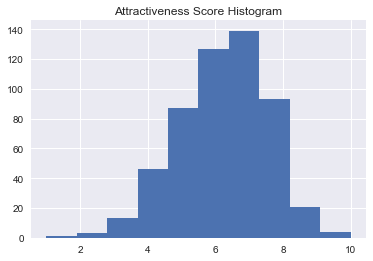

In [214]:
# Drop rows with any nulls
data.dropna(how='any', inplace=True);

# Take most popular attr score for each subject
df = data.groupby('iid').agg(lambda x:x.value_counts().index[0])
ax = df.attr_o.hist();
plt.title('Attractiveness Score Histogram')

### Decision Trees

In [216]:
# Try Classifier Tree
import numpy as np
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [230]:
X = df.drop(['attr_o'], axis=1, inplace=False)
y = df.attr_o

# Fit a classification tree with max_depth=2 on all data.
from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier(max_depth=None, random_state=1)
treeclf.fit(X, y)

scores = cross_val_score(treeclf, X, y, cv=14, scoring='accuracy')
print np.mean(scores)
print scores

# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature.
pd.DataFrame({'feature':X.columns, 'importance':treeclf.feature_importances_})

0.202519618995
[ 0.13636364  0.26190476  0.21428571  0.15        0.10526316  0.21052632
  0.26315789  0.21621622  0.24324324  0.25        0.19444444  0.19444444
  0.27777778  0.11764706]


,feature,importance
0,gender,0.025814
1,age,0.122294
2,field_cd,0.088026
3,career_c,0.044526
4,goal,0.063704
5,exphappy,0.102648
6,attr3_1,0.072502
7,sinc3_1,0.060175
8,fun3_1,0.086430
9,intel3_1,0.057624


In [225]:
# Let's find optimal depth
# List of values to try:
max_depth_range = range(1, 20)

# List to store the average accuracy for each value of max_depth:
acc_scores = []

for depth in max_depth_range:
    treeclf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    scores = cross_val_score(treeclf, X, y, cv=14, scoring='accuracy')
    acc_scores.append(np.mean(scores))

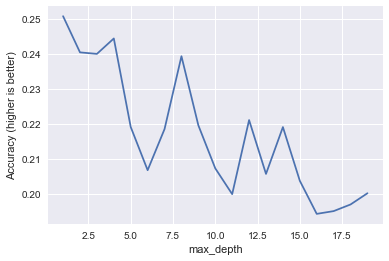

In [226]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, acc_scores);
plt.xlabel('max_depth');
plt.ylabel('Accuracy (higher is better)');

In [231]:
X = df.drop(['attr_o'], axis=1, inplace=False)
y = df.attr_o

# Fit a classification tree with max_depth=2 on all data.
from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier(max_depth=2, random_state=1)
treeclf.fit(X, y)

scores = cross_val_score(treeclf, X, y, cv=14, scoring='accuracy')
print np.mean(scores)
print scores

# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature.
pd.DataFrame({'feature':X.columns, 'importance':treeclf.feature_importances_})

0.240423649092
[ 0.18181818  0.19047619  0.14285714  0.25        0.23684211  0.26315789
  0.23684211  0.21621622  0.27027027  0.27777778  0.25        0.27777778
  0.27777778  0.29411765]


,feature,importance
0,gender,0.000000
1,age,0.328263
2,field_cd,0.000000
3,career_c,0.326792
4,goal,0.000000
5,exphappy,0.000000
6,attr3_1,0.000000
7,sinc3_1,0.000000
8,fun3_1,0.000000
9,intel3_1,0.344945


### Slight improvement with max depth = 2

In [232]:
# Create a Graphviz file.
from sklearn.tree import export_graphviz
export_graphviz(treeclf, out_file='./tree.dot', feature_names=X.columns)
!dot -Tpng tree.dot -o tree.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [233]:
# Check Null Accuracy
y.value_counts()/y.count()

7.0     0.260300
6.0     0.237828
8.0     0.174157
5.0     0.162921
4.0     0.086142
9.0     0.039326
3.0     0.024345
10.0    0.007491
2.0     0.005618
1.0     0.001873
Name: attr_o, dtype: float64

## Null Accuracy of 0.26 by always choosing 7.0.  The model shows 0.24 which is not better than that.

# Let's Try Logistic Regression

In [294]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

#features = ['attr3_1', 'fun3_1']
features = ['gender'] + attitude + self_perception + behaviors
X = df[features]
y = df.attr_o

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

LR.score(X_test, y_test) # uses accuracy as score

0.26119402985074625

In [295]:
# Try Cross Validation
scores = cross_val_score(LR, X, y, cv=14, scoring='accuracy')
print np.mean(scores)
print scores

0.228055799241
[ 0.15909091  0.23809524  0.21428571  0.2         0.21052632  0.26315789
  0.18421053  0.35135135  0.13513514  0.30555556  0.19444444  0.25
  0.22222222  0.26470588]


### -> Still Not better than Baseline Accuracy

# Convert Prediction to Binary Classifier
### Use binary attractive yes or no from >= 7.0 attr_o score

In [298]:
# Most attractive
y_class = np.where(y >= 7.0, 1, 0)

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X,y_class)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

LR.score(X_test, y_test) # uses accuracy as score

0.58955223880597019

In [300]:
y_train.mean()

0.48749999999999999

In [314]:
# Let's look at Confusion Matrix
metrics.confusion_matrix(y_test, y_pred)

array([[19, 49],
       [10, 56]])

In [305]:
# Try Cross Validation with score as recall
# Try Cross Validation
scores = cross_val_score(LR, X, y_class, cv=14, scoring='accuracy')
print np.mean(scores)
print scores

0.548592114382
[ 0.56410256  0.56410256  0.69230769  0.51282051  0.41025641  0.57894737
  0.57894737  0.60526316  0.55263158  0.57894737  0.44736842  0.59459459
  0.54054054  0.45945946]


## Seems slightly better than the baseline

In [303]:
X.columns

Index([u'gender', u'goal', u'exphappy', u'attr3_1', u'sinc3_1', u'fun3_1',
       u'intel3_1', u'amb3_1', u'date', u'go_out'],
      dtype='object')

In [306]:
# Try Reducing Features
# Try Cross Validation
features = ['gender', 'attr3_1', 'fun3_1', 'intel3_1']
scores = cross_val_score(LR, X[features], y_class, cv=14, scoring='accuracy')
print np.mean(scores)
print scores

0.546319020003
[ 0.69230769  0.58974359  0.61538462  0.53846154  0.43589744  0.5
  0.57894737  0.55263158  0.55263158  0.55263158  0.52631579  0.54054054
  0.56756757  0.40540541]


## Reducing Features yields approx the same accuracy